#**Install Library**

In [35]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet

# Install Pysal - Spatial Statistics
!pip install pysal --quiet
!pip install splot --quiet

Reading package lists...
Building dependency tree...
Reading state information...
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists...
Building dependency tree...
Reading state information...
python3-rtree is already the newest version (0.9.7-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas.git /tmp/pip-req-build-54_dnzk6 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas

In [36]:
!pip install esda

In [37]:
!pip install contextily

#**Import Library**

In [38]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import pysal
from pysal.lib  import weights
from pysal.explore import  esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster


#**Load Dataset**

In [39]:
#from dropbox
#!wget https://www.dropbox.com/s/faadrrss/california.geojson

import geopandas as gpd

# Load GeoJSON data
COUNTY_NAME = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/California_County_Boundaries.geojson"
COUNTY_NAME = gpd.read_file(COUNTY_NAME)

# Display the first few rows of the GeoDataFrame
COUNTY_NAME.head(10)


Output hidden; open in https://colab.research.google.com to view.

# **Get Longitude dan Latitude**

In [40]:
import geopandas as gpd

# Load GeoJSON data
COUNTY_NAME = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/California_County_Boundaries.geojson"
california_map = gpd.read_file(COUNTY_NAME)

# Buat kolom baru 'longitude' dan 'latitude' berdasarkan titik tengah dari geometri
california_map['longitude'] = california_map.centroid.x
california_map['latitude'] = california_map.centroid.y

# Tampilkan DataFrame
california_map[['COUNTY_NAME', 'COUNTY_ABBREV','longitude', 'latitude','SHAPE_Length','SHAPE_Area','geometry']].head()


<ipython-input-40-45d05fff1f89>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  california_map['longitude'] = california_map.centroid.x
<ipython-input-40-45d05fff1f89>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  california_map['latitude'] = california_map.centroid.y


,COUNTY_NAME,COUNTY_ABBREV,longitude,latitude,SHAPE_Length,SHAPE_Area,geometry
0,Alameda,ALA,-121.918574,37.650449,2.538264,0.217411,"MULTIPOLYGON (((-122.27125 37.90503, -122.2702..."
1,Alpine,ALP,-119.820202,38.597937,2.170420,0.198471,"MULTIPOLYGON (((-119.58667 38.71420, -119.5865..."
2,Amador,AMA,-120.651332,38.446278,2.924268,0.161961,"MULTIPOLYGON (((-120.07246 38.70276, -120.0724..."
3,Butte,BUT,-121.600664,39.666961,4.210365,0.455899,"MULTIPOLYGON (((-121.07661 39.59729, -121.0794..."
4,Calaveras,CAL,-120.553767,38.205013,2.989673,0.275908,"MULTIPOLYGON (((-120.01792 38.43586, -120.0178..."


# **Create Boundaries California Map**

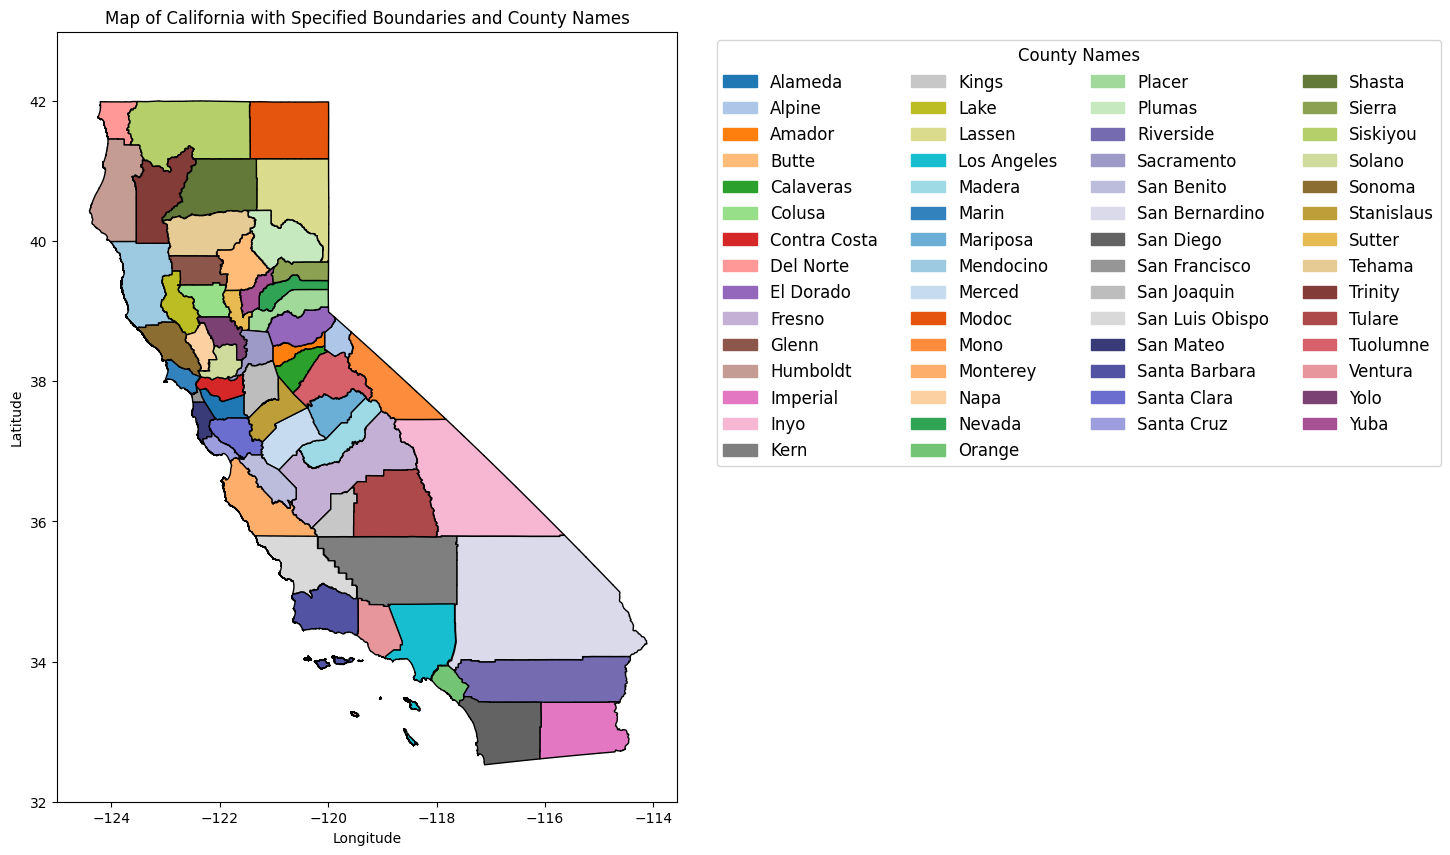

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import cm, colors

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/California_County_Boundaries.geojson"
california_map = gpd.read_file(geojson_url)

# Get unique county names and count
county_names = california_map['COUNTY_NAME'].unique()
num_counties = len(county_names)

# Generate a colormap with a unique color for each county name
cmap = colors.ListedColormap(cm.tab20.colors + cm.tab20c.colors + cm.tab20b.colors, name='tab60')
colors = cmap(range(num_counties))
county_color_map = {name: color for name, color in zip(county_names, colors)}

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))

# Plot each county with a different color
for name in county_names:
    county_data = california_map[california_map['COUNTY_NAME'] == name]
    county_data.plot(ax=ax, color=county_color_map[name], edgecolor='black', label=name)

# Create legend patches and labels
legend_patches = [Patch(color=county_color_map[name], label=name) for name in county_names]

# Add legend outside the plot with 4 columns
ax.legend(handles=legend_patches, title='County Names', title_fontsize='large', fontsize='large', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=4)

# Set the limits for longitude and latitude
min_lat, min_lon = 32, -125
max_lat, max_lon = 42.99, -113.56
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Add labels and title
plt.title('Map of California with Specified Boundaries and County Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


# **Load Earthquake Dataset**

In [58]:
import pandas as pd

# URLs of the datasets
datasets = [
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956589.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956945.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2957178.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2958436.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2959247.csv"
]

# Define the column names based on the dataset structure
column_names = [
    "Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# List to hold DataFrames
dfs = []

# Read each dataset and append to the list
for dataset in datasets:
    df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)
    dfs.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Replace zeros in the Magnitude and Depth columns with NaN
merged_df['Magnitude'] = merged_df['Magnitude'].replace(0, pd.NA)
merged_df['Depth'] = merged_df['Depth'].replace(0, pd.NA)

# Forward fill NaN values in the Magnitude and Depth columns
merged_df['Magnitude'] = merged_df['Magnitude'].fillna(method='ffill')
merged_df['Depth'] = merged_df['Depth'].fillna(method='ffill')

# Display the first few rows of the original merged dataframe
#print("Original Merged DataFrame:")
#print(merged_df.head(10))

# Definisi batas-batas koordinat geografis
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

# Filter data berdasarkan batas-batas koordinat geografis
filtered_df = merged_df[
    (merged_df['Latitude'] >= min_lat) &
    (merged_df['Latitude'] <= max_lat) &
    (merged_df['Longitude'] >= min_lon) &
    (merged_df['Longitude'] <= max_lon)
]

# Display the first few rows of the filtered dataframe
#print("Filtered DataFrame:")
#print(filtered_df.head(10))

# Check the min and max of filtered coordinates
#print(f"Min Latitude: {filtered_df['Latitude'].min()}, Max Latitude: {filtered_df['Latitude'].max()}")
#print(f"Min Longitude: {filtered_df['Longitude'].min()}, Max Longitude: {filtered_df['Longitude'].max()}")

merged_df = filtered_df

# Display the first few rows of the final merged dataframe
print("Final Merged DataFrame:")
merged_df.head(10)


<ipython-input-58-b9b09e1801ca>:23: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)


Final Merged DataFrame:


,Date,Time,Latitude,Longitude,Depth,Magnitude,MagType,Nst,Gap,Clo,Rms,Source,EventID
1050,24/01/2007,11:30:16,37.4133,-117.0986,6.10,4.09,ML,34,0.0,0.0,106,19,0.15
1051,24/01/2007,13:42:53,40.3115,-124.5853,19.05,4.40,Mw,28,0.0,0.0,232,25,0.08
1633,09/02/2007,03:33:44,33.2113,-116.1480,11.88,4.29,ML,102,0.0,0.0,0.23,CI,10230869.00
2245,26/02/2007,12:19:55,40.6428,-124.8628,-0.53,5.40,Mw,85,0.0,0.0,244,48,0.19
2367,02/03/2007,04:40:01,37.8965,-122.1113,15.98,4.23,Mw,152,0.0,0.0,29,3,0.20
2627,09/03/2007,03:17:32,38.4269,-119.3695,10.12,4.76,ML,42,0.0,0.0,79,10,0.14
3387,30/03/2007,09:09:36,36.0277,-117.7753,-0.66,4.11,ML,37,0.0,0.0,0.38,CI,14282008.00
3994,05/04/2007,22:54:30,40.3112,-124.5840,17.92,4.10,Mw,31,0.0,0.0,230,24,0.10
4123,07/04/2007,23:55:04,40.6032,-124.7713,20.48,4.20,Mw,36,0.0,0.0,241,39,0.14
4463,15/04/2007,22:57:27,32.6923,-116.0565,7.70,4.41,ML,72,0.0,0.0,0.29,CI,14285168.00


In [59]:
import pandas as pd

# Kolom dataset
column_names = [
    "Date", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# Membaca dataset
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch2962551.txt"
df1 = pd.read_csv(dataset1, delimiter=',', names=column_names, header=None, skiprows=1)

# Memisahkan kolom "Date" menjadi kolom "Date" dan "Time"
df1[['Date', 'Time']] = df1['Date'].str.split(expand=True)

# Mengubah format kolom "Date" menjadi "DD/MM/YYYY"
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%d/%m/%Y')

# Mengubah format kolom "Time" menjadi "HH:MM:SS"
df1['Time'] = df1['Time'].str.split('.').str[0]

# Menyimpan hanya kolom yang diminta
df1 = df1[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]

# Definisi batas-batas koordinat geografis
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

# Filter data berdasarkan batas-batas koordinat geografis
filtered_df1 = df1[
    (df1['Latitude'] >= min_lat) &
    (df1['Latitude'] <= max_lat) &
    (df1['Longitude'] >= min_lon) &
    (df1['Longitude'] <= max_lon)
]

# Menampilkan 10 baris pertama dari data yang telah difilter
filtered_df1.head(10)
df1 = filtered_df1
df1.head(10)

,Date,Time,Latitude,Longitude,Depth,Magnitude,MagType,Nst
0,03/01/2013,21:04:25,36.56367,-121.07066,8.177,3.40,Mw,95
2,08/01/2013,17:43:18,37.42283,-118.32967,5.860,3.19,Md,47
3,11/01/2013,10:46:02,39.78083,-123.56667,8.306,3.31,Mw,33
5,15/01/2013,15:14:30,36.56333,-121.07467,7.967,3.52,Mw,93
6,15/01/2013,15:18:14,36.56317,-121.07417,7.147,3.07,ML,93
7,16/01/2013,11:25:40,35.48867,-118.27817,5.704,3.54,ML,40
8,19/01/2013,21:15:10,38.21100,-117.98400,17.941,3.04,ML,63
9,21/01/2013,01:25:57,34.78483,-119.47550,10.716,3.29,ML,49
10,23/01/2013,06:26:39,35.02017,-123.84267,2.170,3.06,Md,44
11,24/01/2013,08:21:48,38.55900,-119.62033,4.055,3.67,Mw,38


In [60]:
import pandas as pd

# Kolom dataset
column_names = [
    "Date", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# Membaca dataset
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch179919.csv"
df2 = pd.read_csv(dataset2, delimiter=',', names=column_names, header=None, skiprows=1)

# Memisahkan kolom "Date" menjadi kolom "Date" dan "Time"
df2[['Date', 'Time']] = df2['Date'].str.split(expand=True)

# Mengubah format kolom "Date" menjadi "DD/MM/YYYY"
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%d/%m/%Y')

# Mengubah format kolom "Time" menjadi "HH:MM:SS"
df2['Time'] = df2['Time'].str.split('.').str[0]

# Menyimpan hanya kolom yang diminta
df2 = df2[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]

# Definisi batas-batas koordinat geografis
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

# Filter data berdasarkan batas-batas koordinat geografis
filtered_df2 = df2[
    (df2['Latitude'] >= min_lat) &
    (df2['Latitude'] <= max_lat) &
    (df2['Longitude'] >= min_lon) &
    (df2['Longitude'] <= max_lon)
]

# Menampilkan 10 baris pertama dari data yang telah difilter
filtered_df2.head(10)
df2 = filtered_df2
df2.head(10)

,Date,Time,Latitude,Longitude,Depth,Magnitude,MagType,Nst
0,01/01/2022,06:10:48,35.89950,-120.44100,5.65,3.29,ML,65
1,03/01/2022,02:34:48,35.31783,-119.40850,12.05,4.05,ML,72
2,05/01/2022,07:20:55,38.18884,-117.86200,1.48,4.36,Mw,14
3,05/01/2022,07:21:13,38.20917,-117.80133,21.62,4.37,Mw,61
4,06/01/2022,00:28:07,37.33383,-117.90234,9.50,4.75,Mw,70
5,06/01/2022,02:42:10,40.38467,-124.86433,12.57,4.58,Mw,145
6,06/01/2022,04:21:22,38.19450,-117.88834,-1.84,3.62,ML,46
7,07/01/2022,00:56:40,40.47800,-124.32183,18.75,3.03,ML,40
8,07/01/2022,02:32:07,37.33633,-117.90283,8.72,3.01,ML,49
9,08/01/2022,06:21:31,34.43433,-118.99683,-0.76,3.70,ML,33


In [61]:
# Menggabungkan df1 dan df
combined_df = pd.concat([df1, merged_df, df2], ignore_index=True)
combined_df = combined_df[["Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "MagType", "Nst"]]

# Menampilkan 10 baris pertama dari DataFrame gabungan
combined_df.head(10)

,Date,Time,Latitude,Longitude,Depth,Magnitude,MagType,Nst
0,03/01/2013,21:04:25,36.56367,-121.07066,8.177,3.40,Mw,95
1,08/01/2013,17:43:18,37.42283,-118.32967,5.860,3.19,Md,47
2,11/01/2013,10:46:02,39.78083,-123.56667,8.306,3.31,Mw,33
3,15/01/2013,15:14:30,36.56333,-121.07467,7.967,3.52,Mw,93
4,15/01/2013,15:18:14,36.56317,-121.07417,7.147,3.07,ML,93
5,16/01/2013,11:25:40,35.48867,-118.27817,5.704,3.54,ML,40
6,19/01/2013,21:15:10,38.21100,-117.98400,17.941,3.04,ML,63
7,21/01/2013,01:25:57,34.78483,-119.47550,10.716,3.29,ML,49
8,23/01/2013,06:26:39,35.02017,-123.84267,2.170,3.06,Md,44
9,24/01/2013,08:21:48,38.55900,-119.62033,4.055,3.67,Mw,38


In [64]:
import folium
from folium.plugins import FloatImage

# Buat objek peta
m = folium.Map(location=[37, -120], zoom_start=6)  # Koordinat tengah California

# Buat dictionary untuk memetakan rentang magnitude ke warna
color_scale = {
    (0, 3): 'lightgreen',
    (3, 5): 'orange',
    (5, 7): 'red',
    (7, float('inf')): 'darkred'
}

# Tambahkan marker untuk setiap gempa bumi
for idx, row in combined_df.iterrows():
    # Tentukan warna berdasarkan nilai rata-rata magnitude
    color = 'blue'  # Default color jika tidak ada nilai rata-rata magnitude
    for mag_range, mag_color in color_scale.items():
        if mag_range[0] <= row['Magnitude'] < mag_range[1]:
            color = mag_color
            break

    # Tambahkan marker dengan warna yang sesuai
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=3,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.6,
                        popup=f"Magnitude: {row['Magnitude']:.2f}").add_to(m)

# Buat legenda
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 180px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 opacity: 0.8;
                 ">
     <p style="margin-top: 5px; margin-left: 5px;">Legend</p>
     <p style="margin-left: 10px; font-size: 16px; color: lightgreen;">0-3</p>
     <p style="margin-left: 10px; font-size: 16px; color: orange;">3-5</p>
     <p style="margin-left: 10px; font-size: 16px; color: red;">5-7</p>
     <p style="margin-left: 10px; font-size: 16px; color: darkred;">7+</p>
      </div>
     '''

# Tambahkan legenda ke peta
m.get_root().html.add_child(folium.Element(legend_html))

# Tampilkan peta
m


Output hidden; open in https://colab.research.google.com to view.

# **Spatial distribution**

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-65-8d115b96a233>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdf['Time'] = pd.to_datetime(gdf['Time'])


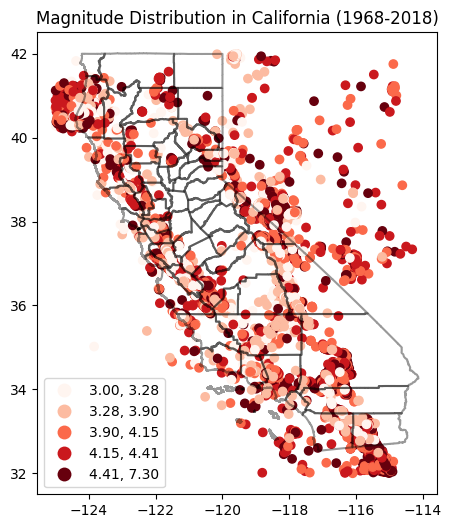

In [65]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Baca GeoDataFrame dari URL GeoJSON
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/California_County_Boundaries.geojson"
gdf_boundary = gpd.read_file(geojson_url)

# Membuat geometry column
geometry = [Point(xy) for xy in zip(combined_df['Longitude'], combined_df['Latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Membuat Geographic DataFrame
gdf = gpd.GeoDataFrame(combined_df, crs=crs, geometry=geometry)

# Konversi kolom 'Time' ke format datetime
gdf['Time'] = pd.to_datetime(gdf['Time'])

# Mengambil hanya kolom yang diinginkan
gdf_selected = gdf[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst', 'geometry']]

# Menentukan warna dan skema pengisian
cmap = "Reds"  # Palet warna
column = "Magnitude"  # Kolom untuk pengisian
scheme = "quantiles"  # Skema pengisian (quantiles)

# Membuat peta menggunakan matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting data gdf_selected
gdf_selected.plot(column=column, cmap=cmap, scheme=scheme, legend=True, ax=ax)

# Plotting batas menggunakan gdf_boundary
gdf_boundary.boundary.plot(ax=ax, color='black', alpha=0.4)

# Menambahkan judul
plt.title("Magnitude Distribution in California (1968-2018)")

# Menampilkan peta
plt.show()


# **Statistics**

In [67]:
# Define the magnitude ranges
mag_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9)]

# Initialize an empty list to store the statistics
statistics = []

# Calculate statistics for each magnitude range
for mag_range in mag_ranges:
    min_mag, max_mag = mag_range
    subset = combined_df[(combined_df['Magnitude'] >= min_mag) & (combined_df['Magnitude'] <= max_mag)]
    total = len(subset)
    percentage = (total / len(combined_df)) * 100
    min_magnitude = subset['Magnitude'].min()
    max_magnitude = subset['Magnitude'].max()
    mean_magnitude = subset['Magnitude'].mean()
    sd_magnitude = subset['Magnitude'].std()
    statistics.append({
        'Magnitude Earthquake': f"{min_mag}≤M≤{max_mag}",
        'Total': total,
        '% earthquake': percentage,
        'Minimum Magnitude': min_magnitude,
        'Maximum Magnitude': max_magnitude,
        'Mean Magnitude': mean_magnitude,
        'SD Magnitude': sd_magnitude
    })

# Create a DataFrame from the statistics
statistics_df = pd.DataFrame(statistics)

# Print the statistics table
print("Table 1. Statistic table of earthquakes")
statistics_df

Table 1. Statistic table of earthquakes


,Magnitude Earthquake,Total,% earthquake,Minimum Magnitude,Maximum Magnitude,Mean Magnitude,SD Magnitude
0,2≤M≤3.9,2112,40.053101,3.0,3.9,3.330317,0.246121
1,4≤M≤4.9,2773,52.588659,4.0,4.9,4.288402,0.237115
2,5≤M≤5.9,236,4.475631,5.0,5.9,5.326441,0.264340
3,6≤M≤9.9,35,0.663759,6.0,7.3,6.430857,0.395715


# **Global Spatial Autocorrelation**

In [68]:
import pandas as pd
from libpysal import weights
from esda.moran import Moran

# Buat geometri kolom menggunakan longitude dan latitude
combined_df['geometry'] = combined_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Bangun matriks spatialis
w = weights.KNN.from_dataframe(combined_df, k=1)

# Periksa apakah matriks bobot terhubung sepenuhnya
if not w.islands:
    print("Matriks bobot terhubung sepenuhnya.")
else:
    print("Matriks bobot tidak sepenuhnya terhubung. Ada komponen yang tidak terhubung.")

# Hitung Moran's I
moran = Moran(combined_df['Magnitude'], w)

# Print Moran's I
print("Moran's I:", moran.I)
print("P-value:", moran.p_sim)


Matriks bobot terhubung sepenuhnya.
Moran's I: 0.34445539439717077
P-value: 0.001


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 1516 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


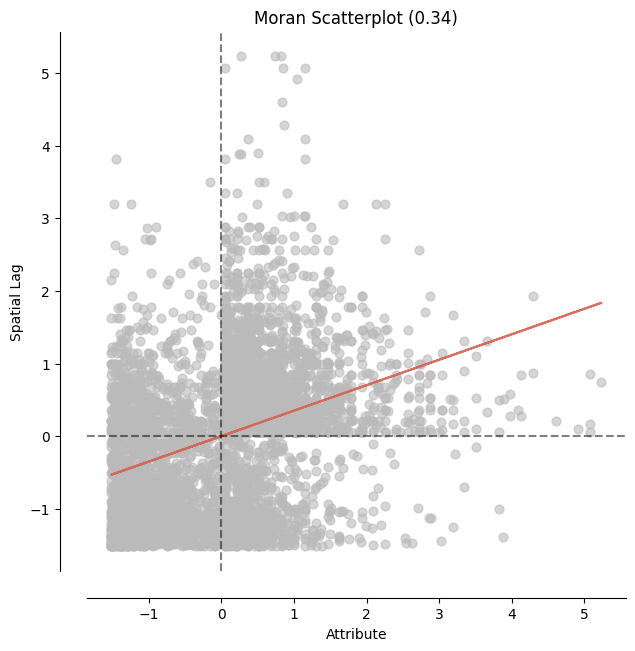

In [69]:
from splot.esda import moran_scatterplot

# Buat Moran Scatter plot
fig, ax = moran_scatterplot(moran, zstandard=True)
plt.show()


In [70]:
import pandas as pd
from libpysal import weights
from esda.moran import Moran
from shapely.geometry import Point

# Buat kolom geometri menggunakan longitude dan latitude
combined_df['geometry'] = combined_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Bangun matriks spatialis untuk seluruh data
w = weights.KNN.from_dataframe(combined_df, k=1)

# Periksa apakah matriks bobot terhubung sepenuhnya
if not w.islands:
    print("Matriks bobot terhubung sepenuhnya.")
else:
    print("Matriks bobot tidak sepenuhnya terhubung. Ada komponen yang tidak terhubung.")

# Mendefinisikan fungsi untuk menghitung Moran's I berdasarkan rentang magnitude
def calculate_moran_i(combined_df, mag_range):
    df_subset = combined_df[(combined_df['Magnitude'] >= mag_range[0]) & (combined_df['Magnitude'] < mag_range[1])]
    # Periksa apakah ada observasi di subset data
    if len(df_subset) > 0:
        w_subset = weights.KNN.from_dataframe(df_subset, k=1)
        moran_subset = Moran(df_subset['Magnitude'], w_subset)
        return moran_subset
    else:
        return None

# Hitung Moran's I untuk setiap rentang magnitude
magnitude_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9), (2, 9.9)]
moran_results = {}
for mag_range in magnitude_ranges:
    moran_result = calculate_moran_i(combined_df, mag_range)
    if moran_result:
        moran_results[mag_range] = moran_result

# Buat dataframe dari hasil analisis Moran's I
data = []
for mag_range, moran_result in moran_results.items():
    # Tentukan Pattern Type berdasarkan p-value
    pattern_type = "Random" if moran_result.p_sim >= 0.05 else "Clustered"
    data.append({
        'Magnitude Range': f"{mag_range[0]}≤M<{mag_range[1]}",
        "Moran's I": moran_result.I,
        'P-value': moran_result.p_sim,
        'Z Statistic': moran_result.z_sim,
        'Pattern Type': pattern_type
    })

df_result = pd.DataFrame(data)

# Tampilkan dataframe
df_result


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 1516 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 612 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Matriks bobot terhubung sepenuhnya.


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 793 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 70 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


,Magnitude Range,Moran's I,P-value,Z Statistic,Pattern Type
0,2≤M<3.9,0.057208,0.008,2.182052,Clustered
1,4≤M<4.9,0.079595,0.001,3.509433,Clustered
2,5≤M<5.9,0.008486,0.458,0.151330,Random
3,6≤M<9.9,-0.126320,0.353,-0.459614,Random
4,2≤M<9.9,0.344455,0.001,19.585117,Clustered


# **Analysis Result of Average Nearest Neighbor**

In [71]:
from pysal.lib import weights
from esda import Moran_Local

# Define the magnitude ranges
mag_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9)]

# Initialize an empty list to store the analysis results
analysis_results = []

# Calculate Average Nearest Neighbor (ANN) for each magnitude range
for min_mag, max_mag in mag_ranges:
    subset = combined_df[(combined_df['Magnitude'] >= min_mag) & (combined_df['Magnitude'] <= max_mag)]
    try:
        w = weights.KNN.from_dataframe(subset, k=1)
        local_moran = Moran_Local(subset['Magnitude'], w)
        avg_nearest_neighbor = local_moran.Is.mean()
        z_statistic = local_moran.z.mean()
        p_value = local_moran.p_sim.mean()
        pattern_type = "Clustered" if (z_statistic < 0) else "Dispersed"
    except ValueError:
        avg_nearest_neighbor = 0
        z_statistic = 0
        p_value = 1
        pattern_type = "Insufficient neighbors"
    analysis_results.append({
        'Magnitude': f"{min_mag}≤M≤{max_mag}",
        'Average Nearest Neighbor': avg_nearest_neighbor,
        'Z Statistic': z_statistic,
        'P value': p_value,
        'Pattern type': pattern_type
    })

# Create a DataFrame from the analysis results
analysis_results_df = pd.DataFrame(analysis_results)

# Print the analysis results table
print("Table 2. Analysis Result of Average Nearest Neighbor")
analysis_results_df


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 616 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 802 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Table 2. Analysis Result of Average Nearest Neighbor


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 70 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


,Magnitude,Average Nearest Neighbor,Z Statistic,P value,Pattern type
0,2≤M≤3.9,0.064966,-9.621933e-16,0.251921,Clustered
1,4≤M≤4.9,0.076141,-7.328353e-16,0.249960,Clustered
2,5≤M≤5.9,0.057474,-3.048409e-16,0.254792,Clustered
3,6≤M≤9.9,-0.122711,-1.641544e-15,0.252086,Clustered


# **Analysis result of Getis-Ord general**



In [75]:
import pandas as pd
from libpysal import weights
from esda.getisord import G_Local
from shapely.geometry import Point

# Buat kolom geometri menggunakan longitude dan latitude
combined_df['geometry'] = combined_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Mendefinisikan fungsi untuk menghitung Getis-Ord General Index berdasarkan rentang magnitude
def calculate_getisord_index(combined_df, mag_range):
    df_subset = combined_df[(combined_df['Magnitude'] >= mag_range[0]) & (combined_df['Magnitude'] <= mag_range[1])]
    # Periksa apakah ada data dalam subset
    if df_subset.shape[0] > 0:  # Gunakan 'shape[0]' untuk mendapatkan jumlah baris DataFrame
        # Bangun matriks spatialis untuk subset data
        w_subset = weights.KNN.from_dataframe(df_subset, k=1)
        # Hitung Getis-Ord General Index
        glocal = G_Local(df_subset['Magnitude'], w_subset)
        return glocal
    else:
        print(f"No data found for magnitude range {mag_range}")
        return None

# Hitung Getis-Ord General Index untuk setiap rentang magnitude
magnitude_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9), (2, 9.9)]
getisord_results = {}
for mag_range in magnitude_ranges:
    getisord_result = calculate_getisord_index(combined_df, mag_range)
    if getisord_result is not None:  # Periksa jika hasilnya tidak None
        getisord_results[mag_range] = getisord_result

# Buat dataframe dari hasil analisis Getis-Ord General Index
data = []
for mag_range, getisord_result in getisord_results.items():
    # Ambil nilai indeks, Z Statistic, dan p-value untuk setiap baris yang Highly Clustered
    for i in range(len(getisord_result.z_sim)):
        if getisord_result.p_sim[i] < 0.05:  # Filter hanya untuk Highly Clustered
            data.append({
                'Magnitude Range': f"{mag_range[0]}≤M≤{mag_range[1]}",
                'Getis-Ord General Index': getisord_result.Gs[i],
                'Index Z Statistic': getisord_result.z_sim[i],
                'P-value': getisord_result.p_sim[i],
                'Pattern Type': "Highly Clustered"
            })

df_result = pd.DataFrame(data)

# Tampilkan dataframe
print("Table of Analysis result of Getis-Ord General")
df_result

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 802 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 70 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 1516 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Table of Analysis result of Getis-Ord General


,Magnitude Range,Getis-Ord General Index,Index Z Statistic,P-value,Pattern Type
0,2≤M≤3.9,0.000428,-1.335411,0.019,Highly Clustered
1,2≤M≤3.9,0.000555,2.224598,0.009,Highly Clustered
2,2≤M≤3.9,0.000427,-1.374485,0.001,Highly Clustered
3,2≤M≤3.9,0.000430,-1.293042,0.035,Highly Clustered
4,2≤M≤3.9,0.000428,-1.333172,0.019,Highly Clustered
...,...,...,...,...,...
1172,2≤M≤9.9,0.000146,-1.430774,0.045,Highly Clustered
1173,2≤M≤9.9,0.000145,-1.460363,0.033,Highly Clustered
1174,2≤M≤9.9,0.000143,-1.523568,0.001,Highly Clustered
1175,2≤M≤9.9,0.000308,3.924117,0.004,Highly Clustered


# **KDE**

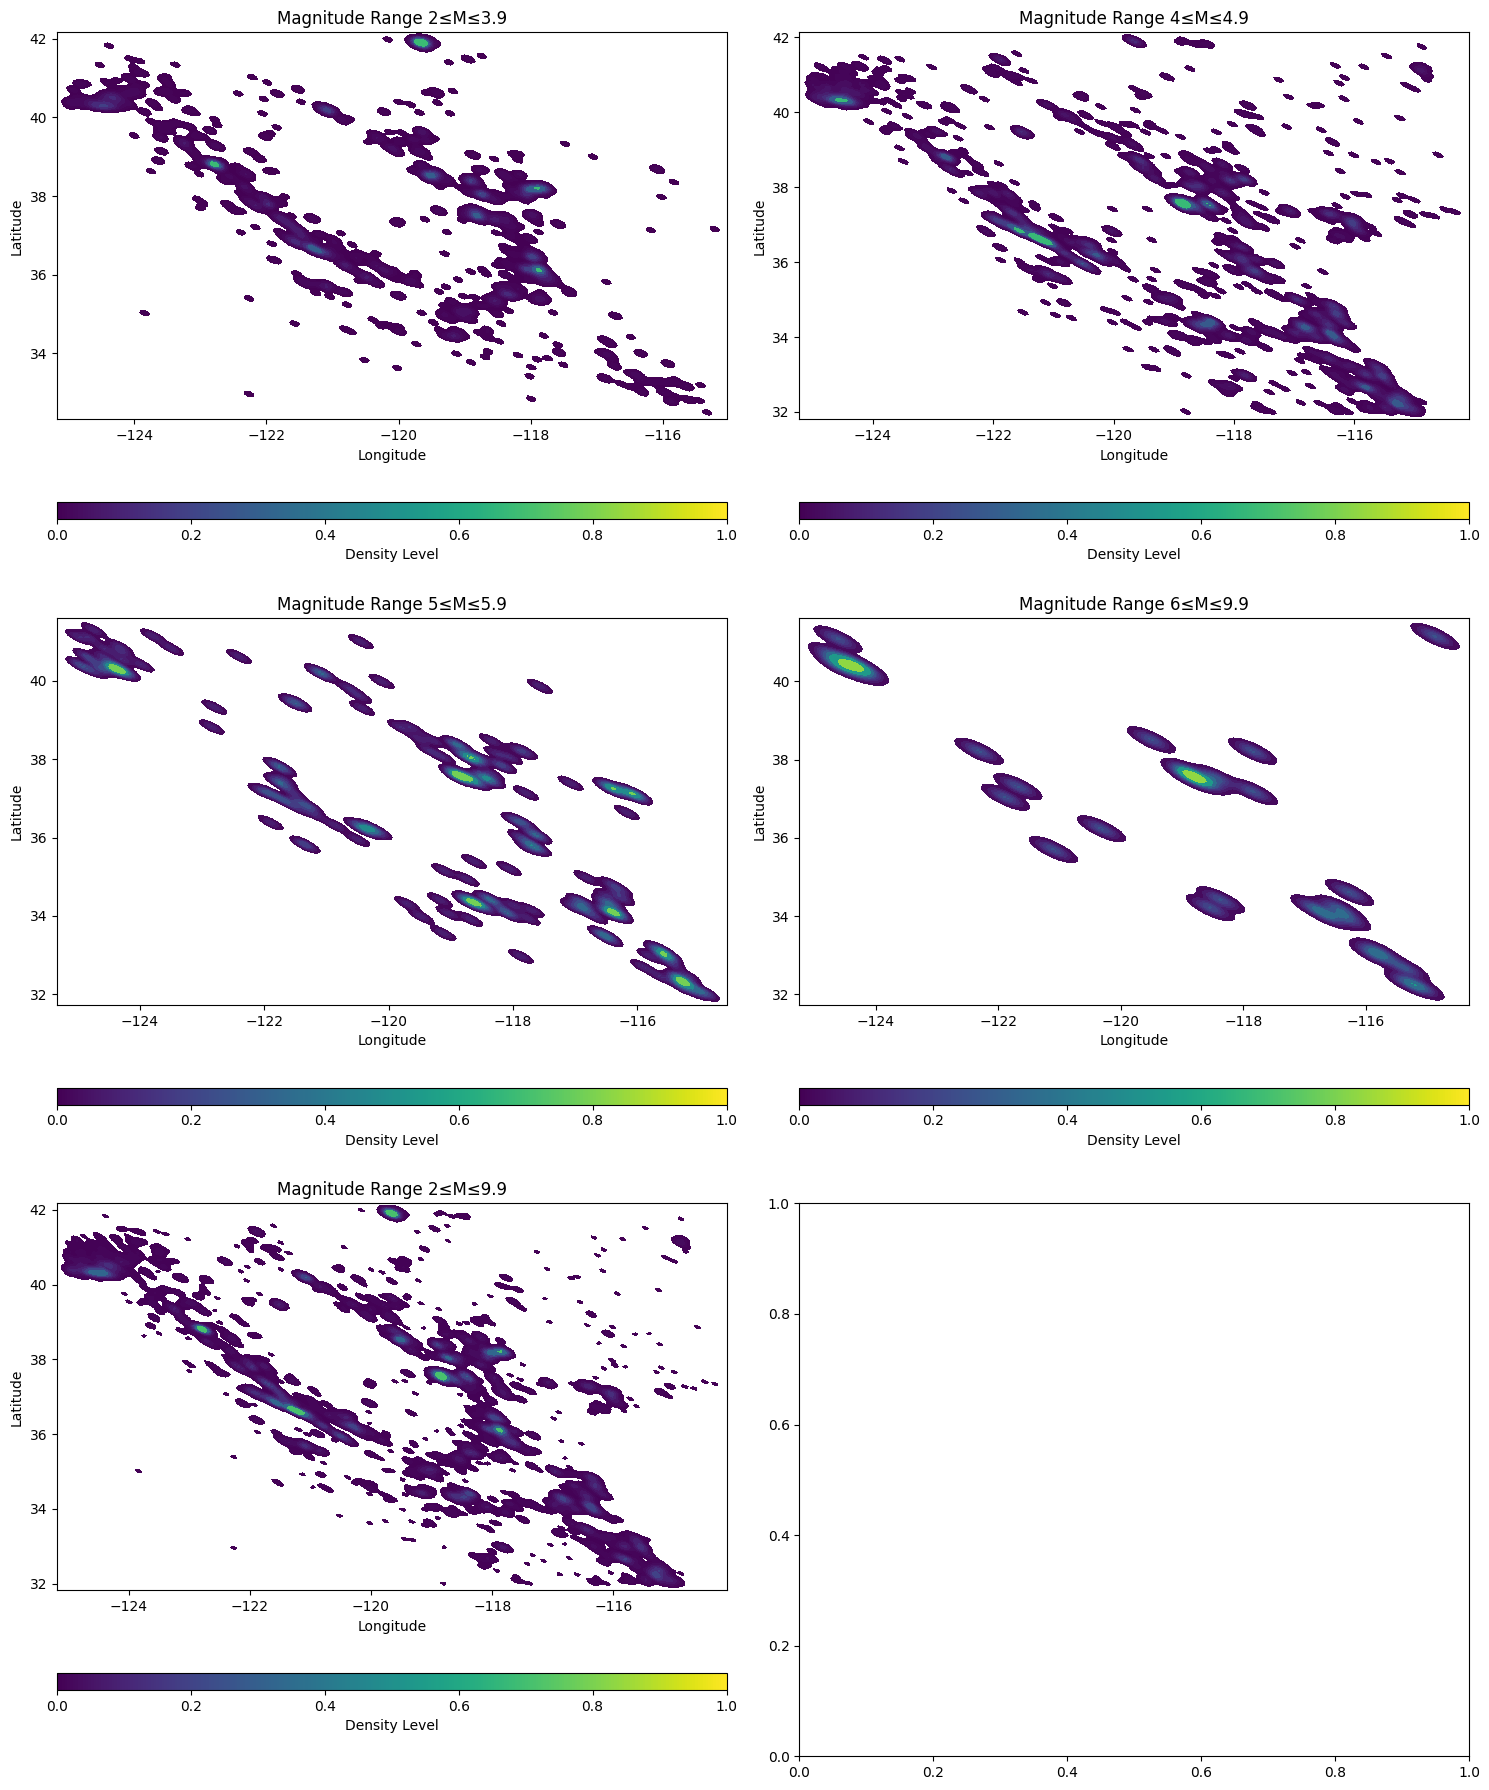

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan rentang magnitudo
magnitude_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9), (2, 9.9)]

# Hitung jumlah baris dan kolom yang dibutuhkan
num_rows = (len(magnitude_ranges) + 1) // 2
num_cols = 2

# Buat subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6*num_rows))

# Iterasi melalui rentang magnitudo dan plot di setiap subplot
for i, mag_range in enumerate(magnitude_ranges):
    # Filter data berdasarkan rentang magnitudo
    df_subset = combined_df[(combined_df['Magnitude'] >= mag_range[0]) & (combined_df['Magnitude'] <= mag_range[1])]

    # Hitung indeks subplot
    row = i // 2
    col = i % 2

    # Plot KDE pada subplot yang sesuai
    kde = sns.kdeplot(x=df_subset['Longitude'], y=df_subset['Latitude'], cmap='viridis', fill=True, bw_adjust=0.1, ax=axes[row, col])

    # Atur judul subplot
    axes[row, col].set_title(f'Magnitude Range {mag_range[0]}≤M≤{mag_range[1]}')
    axes[row, col].set_xlabel('Longitude')
    axes[row, col].set_ylabel('Latitude')

    # Tambahkan legenda hanya jika plot KDE berhasil dibuat
    if kde.collections:
        cb = fig.colorbar(kde.collections[0], ax=axes[row, col], orientation='horizontal', aspect=40)
        cb.set_label('Density Level')

# Atur layout subplot
plt.tight_layout()

# Tampilkan plot
plt.show()


# **Local Autocorrelation**

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 1516 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I: 0.34445539439717077


<Figure size 1000x800 with 0 Axes>

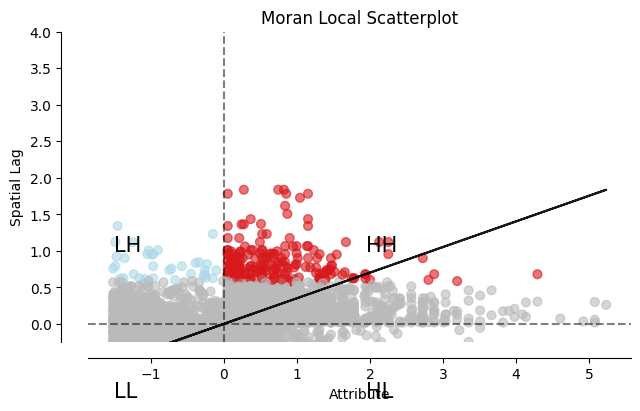

In [77]:
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

# Menghilangkan nilai yang hilang
combined_df = combined_df.dropna(subset=['Magnitude'])

# Membuat matriks bobot spasial
w = weights.KNN.from_dataframe(combined_df, k=1)

# Menghitung Moran's I
y_mag = combined_df['Magnitude']
moran = Moran(y_mag, w)

# Mencetak hasil Moran's I
print("Moran's I:", moran.I)

# Local Moran's I
mag_local_moran = esda.moran.Moran_Local(y_mag, w)

# Plotting Local Moran's I scatterplot
plt.figure(figsize=(10, 8))  # Atur ukuran plot di sini
moran_scatterplot(mag_local_moran, p=0.05)

plt.ylim(-0.25, 4)


# Tambahkan keterangan
plt.text(1.95, 1, 'HH', fontsize=15)
plt.text(1.95, -1.0, 'HL', fontsize=15)
plt.text(-1.5, 1, 'LH', fontsize=15)
plt.text(-1.5, -1, 'LL', fontsize=15)

plt.show()


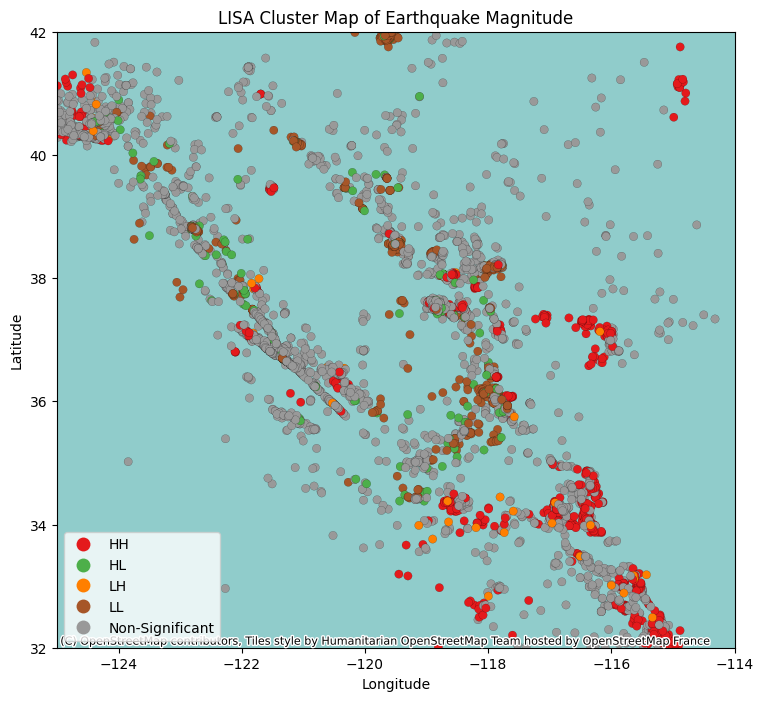

In [86]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from esda.moran import Moran_Local
import libpysal as ps
from splot.esda import lisa_cluster
import contextily as ctx

# Assuming combined_df is already loaded and processed

# Drop rows with missing Magnitude values
combined_df = combined_df.dropna(subset=['Magnitude'])

# Create a spatial weights matrix using KNN
w = ps.weights.KNN.from_dataframe(combined_df, k=8)  # Adjust k as needed

# Calculate Local Moran's I
y_mag = combined_df['Magnitude']
moran_local = Moran_Local(y_mag, w)

# Add Moran's I results to the dataframe
combined_df['moran_local'] = moran_local.Is
combined_df['p_value'] = moran_local.p_sim

# Define clusters based on Local Moran's I results
combined_df['cluster'] = 'Non-Significant'
combined_df.loc[(moran_local.q == 1) & (moran_local.p_sim <= 0.05), 'cluster'] = 'HH'
combined_df.loc[(moran_local.q == 2) & (moran_local.p_sim <= 0.05), 'cluster'] = 'LH'
combined_df.loc[(moran_local.q == 3) & (moran_local.p_sim <= 0.05), 'cluster'] = 'LL'
combined_df.loc[(moran_local.q == 4) & (moran_local.p_sim <= 0.05), 'cluster'] = 'HL'

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(combined_df, geometry=gpd.points_from_xy(combined_df.Longitude, combined_df.Latitude))

# Plotting LISA cluster map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

gdf.plot(column='cluster', categorical=True,
         cmap='Set1', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

# Add tile map for geographic context
try:
    ctx.add_basemap(ax, zoom=7, crs=gdf.crs)
except KeyError as e:
    print(f"KeyError: {e}")
    print("Available providers:", list(ctx.providers.keys()))

# Set map bounds
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Add title and labels
plt.title('LISA Cluster Map of Earthquake Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()
